<a href="https://colab.research.google.com/github/Remian-9080/Enrolment-Prediction/blob/main/Enrolment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Developing a Model Which predicts the chance of enrolments in admission tests by looking upon on someones Profile;**

---




Import Numpy and Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

# Steps
 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


Preprocess + EDA + Feature Selection; Removing the first column, keeping all the rows intact;

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

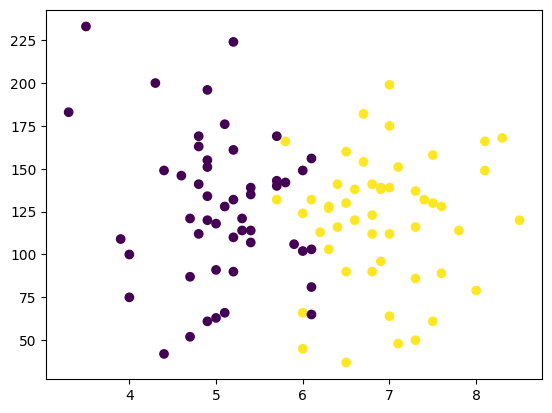

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

Simple EDA technique to differentiate the student got selected in Yellow! Plotted in scattered graph!

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

Spilts I/O columns

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

Split Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [ ]:
X_train

,cgpa,iq
79,6.5,90.0
20,6.6,120.0
37,8.1,149.0
50,3.5,233.0
64,7.0,64.0
...,...,...
54,6.4,141.0
1,5.9,106.0
12,5.4,139.0
43,6.8,141.0


In [ ]:
X_test

,cgpa,iq
6,5.7,143.0
76,4.9,155.0
92,5.2,110.0
38,6.5,160.0
17,3.3,183.0
86,5.1,128.0
10,6.0,45.0
26,7.0,199.0
2,5.3,121.0
57,6.5,130.0


Scalling!

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)


In [ ]:
X_train

array([[ 0.40290296, -0.81419291],
       [ 0.49049057, -0.05194573],
       [ 1.80430458,  0.6848932 ],
       [-2.22472507,  2.81918529],
       [ 0.84084097, -1.47480712],
       [ 1.27877897,  0.91356735],
       [ 0.57807817,  1.52336509],
       [-0.21021024,  1.11683327],
       [-0.29779784,  1.19305798],
       [-1.26126145,  0.60866848],
       [-0.99849865,  0.73570968],
       [-0.03503504,  0.6848932 ],
       [ 0.40290296, -2.16082958],
       [-1.08608625,  0.48162729],
       [-0.56056065, -0.38225284],
       [-1.52402426,  1.9807134 ],
       [-0.82332345,  1.37091566],
       [ 0.92842857,  0.73570968],
       [ 0.31531536, -0.15357869],
       [ 1.19119137,  0.25295314],
       [-1.08608625, -0.25521165],
       [ 1.10360377,  0.37999433],
       [ 0.14014016, -0.22980341],
       [ 1.54154178, -0.20439517],
       [-1.78678706, -0.56011052],
       [ 0.84084097,  0.43081081],
       [ 1.27877897, -1.55103184],
       [-0.03503504, -1.42399065],
       [ 0.57807817,

In [ ]:
X_test = scaler.transform(X_test)


In [ ]:
X_test

array([[-0.29779784,  0.53244377],
       [-0.99849865,  0.83734264],
       [-0.73573585, -0.30602812],
       [ 0.40290296,  0.96438383],
       [-2.39990027,  1.54877333],
       [-0.82332345,  0.15132018],
       [-0.03503504, -1.95756367],
       [ 0.84084097,  1.95530516],
       [-0.64814825, -0.02653749],
       [ 0.40290296,  0.20213666]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

Model Training

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
y_test

6     0
76    0
92    0
38    1
17    0
86    0
10    1
26    1
2     0
57    1
Name: placement, dtype: int64

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

Checking Accuracy Rate!

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)


0.9

Find The Line of Linear Regration!

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

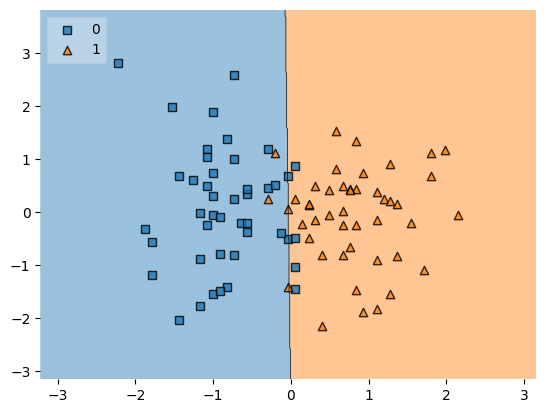

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


Model Picking For deployment!

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))